про структуру нейросети https://python-scripts.com/build-neural-network, графика свиснута у https://github.com/Yuriy-Kanygin/ML2018HW/blob/master/HW4.ipynb, дальше просторы гугла и человеческое озарение

In [1]:
import torch
import torch.nn as nn
import torchvision.datasets as dsets
import torchvision.transforms as transforms
from torch.autograd import Variable

# Обучим сеть с 3мя скрытыми слоями

In [2]:
input_size = 784       # The image size = 28 x 28 = 784
hidden_size_one = 100 # The number of nodes at the hidden layer
hidden_size_two=20
hidden_size_three=10 
num_classes = 10       # The number of output classes. In this case, from 0 to 9
num_epochs = 5         # The number of times entire dataset is trained
batch_size = 100    # The size of input data took for one iteration
learning_rate = 0.001  # The speed of convergence

In [3]:
#pfrh=загружаем тренировочные и тестовые данные
train_dataset = dsets.MNIST(root='./data',
                           train=True,
                           transform=transforms.ToTensor(),
                           download=True)

test_dataset = dsets.MNIST(root='./data',
                           train=False,
                           transform=transforms.ToTensor())

In [4]:
#создаем сеть с одним скрытым слоем, если убрать комменты, то можно увеличить число слоев
class Net(nn.Module):
    def __init__(self, input_size, hidden_size_one,hidden_size_two,hidden_size_three, num_classes):
        super(Net, self).__init__()                    # Inherited from the parent class nn.Module
        self.fc1 = nn.Linear(input_size, hidden_size_one)  # 1st Full-Connected Layer: 784 (input data) -> 500 (hidden node)
        self.relu_1 = nn.ReLU()# Non-Linear ReLU Layer: max(0,x)
        self.fc2 = nn.Linear(hidden_size_one, hidden_size_two)
        self.relu_2 = nn.ReLU()
        self.fc3 = nn.Linear(hidden_size_two, hidden_size_three)
        self.relu_3 = nn.ReLU()
        self.fc4 = nn.Linear(hidden_size_three, num_classes) # 2nd Full-Connected Layer: 500 (hidden node) -> 10 (output class)
    
    def forward(self, x):                              # Forward pass: stacking each layer together
        out = self.fc1(x)
        out = self.relu_1(out)
        out = self.fc2(out)
        out = self.relu_2(out)
        out = self.fc3(out)
        out = self.relu_3(out)
        out = self.fc4(out)
        return out
    

In [5]:
net = Net(input_size, hidden_size_one,hidden_size_two,hidden_size_three, num_classes)


In [6]:
#хотим считать на GPU потому что можем, изменение формата данных и из разделение на стеки
net.cuda()
import matplotlib.pyplot as plt
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                          batch_size=batch_size,
                                          shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False)

In [7]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(net.parameters(), lr=learning_rate)

In [8]:
import matplotlib.pyplot as plt
import matplotlib.animation
import numpy as np
from IPython.display import display, clear_output

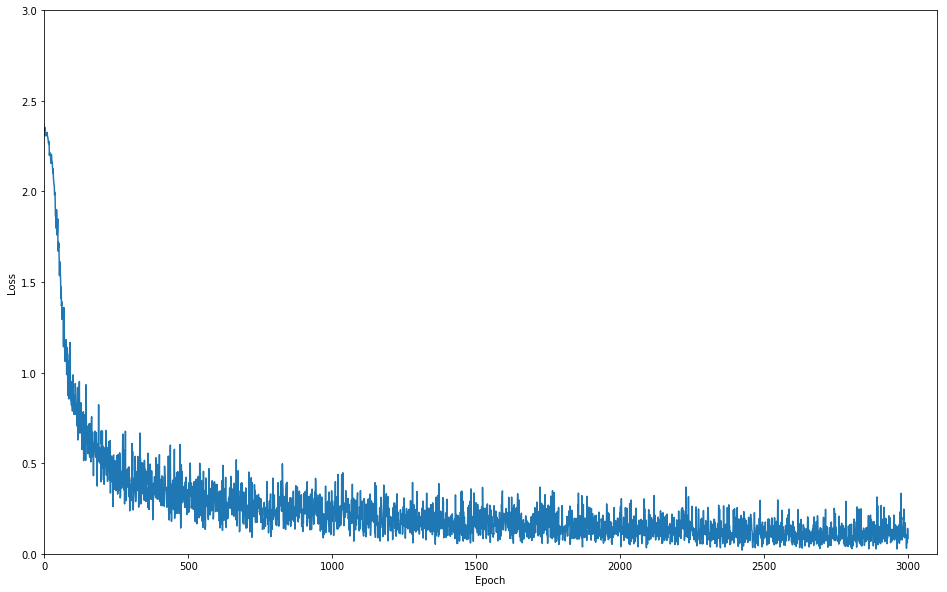

Epoch [5/5], Step [600/600], Loss: 0.0850


In [9]:
#обучение
history=[]
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):   # Load a batch of images with its (index, data, class)
        images = Variable(images.view(-1, 28*28))       # Convert torch tensor to Variable: change image from a vector of size 784 to a matrix of 28 x 28
        labels = Variable(labels)
        labels=labels.type(torch.cuda.LongTensor)
        images = images.type(torch.cuda.FloatTensor)
        optimizer.zero_grad()                             # Intialize the hidden weight to all zeros
        outputs = net(images)                            # Forward pass: compute the output class given a image
        loss = criterion(outputs, labels)                 # Compute the loss: difference between the output class and the pre-given label
        loss.backward()                                   # Backward pass: compute the weight
        optimizer.step()  
        loss = loss.type(torch.FloatTensor)
        # Optimizer: update the weights of hidden nodes
        
        history.append(loss.data.numpy())
        if (i+1) % 100 == 0:                              # Logging
            fig = plt.figure(figsize=(16,10))
            clear_output(True)
            plt.plot(history,label='loss')
            plt.xlabel('Epoch')
            plt.ylabel('Loss')
            plt.ylim(0, 3)
            plt.xlim(0, 3100)
            #plt.legend()
            plt.show()
            print('Epoch [%d/%d], Step [%d/%d], Loss: %.4f'
                 %(epoch+1, num_epochs, i+1, len(train_dataset)//batch_size, loss.data[0]))
history_one=history            

In [10]:
correct = 0
total = 0
for images, labels in test_loader:
    images = Variable(images.view(-1, 28*28))
    images=images.type(torch.cuda.FloatTensor)
    outputs = net(images)
    
    _, predicted = torch.max(outputs.data, 1)  # Choose the best class from the output: The class with the best score
    labels=labels.type(torch.cuda.LongTensor)
    total += labels.size(0)                    # Increment the total count
    correct += (predicted == labels).sum()     # Increment the correct count
    
print('Accuracy of the network on the 10K test images: %d %%' % (100 * correct / total))

Accuracy of the network on the 10K test images: 96 %


# рассмотрим вид кривой обучения в зависимости от колличества нейронов для нейросети с одним скрытым слоем


In [13]:
historical=[]
results=[]
class Net(nn.Module):
    def __init__(self, input_size, hidden_size_one,hidden_size_two,hidden_size_three, num_classes):
        super(Net, self).__init__()                    # Inherited from the parent class nn.Module
        self.fc1 = nn.Linear(input_size, hidden_size_one)  # 1st Full-Connected Layer: 784 (input data) -> 500 (hidden node)
        self.relu_1 = nn.ReLU()# Non-Linear ReLU Layer: max(0,x)
        #self.fc2 = nn.Linear(hidden_size_one, hidden_size_two)
        #self.relu_2 = nn.ReLU()
        #self.fc3 = nn.Linear(hidden_size_two, hidden_size_three)
        #self.relu_3 = nn.ReLU()
        self.fc4 = nn.Linear(hidden_size_one, num_classes) # 2nd Full-Connected Layer: 500 (hidden node) -> 10 (output class)
    
    def forward(self, x):                              # Forward pass: stacking each layer together
        out = self.fc1(x)
        out = self.relu_1(out)
        #out = self.fc2(out)
        #out = self.relu_2(out)
        #out = self.fc3(out)
        #out = self.relu_3(out)
        out = self.fc4(out)
        return out

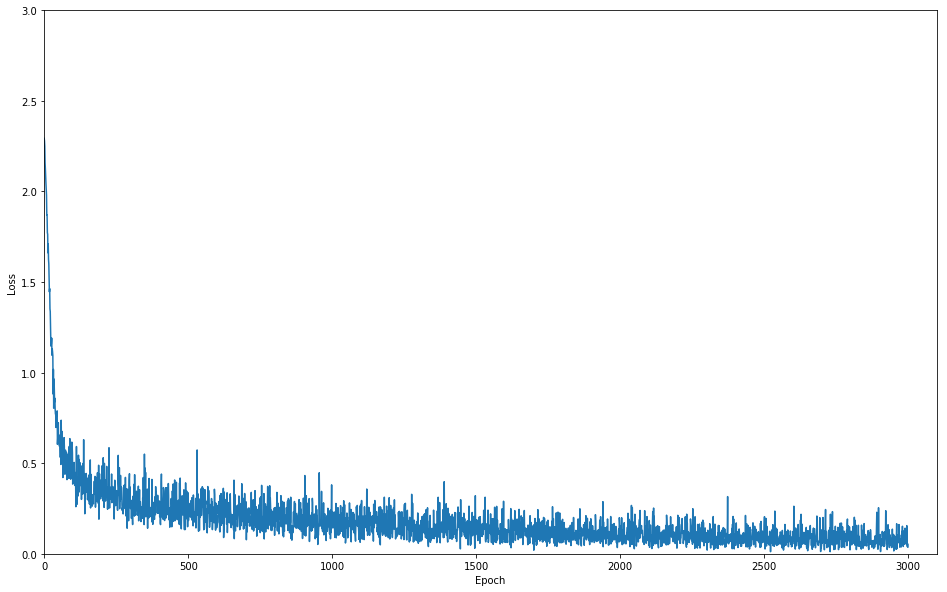

In [14]:
#pfrh=загружаем тренировочные и тестовые данные
for i in range(10):
    input_size = 784       # The image size = 28 x 28 = 784
    hidden_size_one = 10*i+10 # The number of nodes at the hidden layer
    hidden_size_two=20
    hidden_size_three=10 
    num_classes = 10       # The number of output classes. In this case, from 0 to 9
    num_epochs = 5         # The number of times entire dataset is trained
    batch_size = 100    # The size of input data took for one iteration
    learning_rate = 0.001  # The speed of convergence
    
    train_dataset = dsets.MNIST(root='./data',
                                train=True,
                                transform=transforms.ToTensor(),
                                download=True)

    test_dataset = dsets.MNIST(root='./data',
                               train=False,
                               transform=transforms.ToTensor())

    train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                              batch_size=batch_size,
                                              shuffle=True)

    test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                              batch_size=batch_size,
                                              shuffle=False)
    net = Net(input_size, hidden_size_one,hidden_size_two,hidden_size_three, num_classes)
    net.cuda()
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(net.parameters(), lr=learning_rate)
    history=[]
    for epoch in range(num_epochs):
        for i, (images, labels) in enumerate(train_loader):   # Load a batch of images with its (index, data, class)
            images = Variable(images.view(-1, 28*28))       # Convert torch tensor to Variable: change image from a vector of size 784 to a matrix of 28 x 28
            labels = Variable(labels)
            labels=labels.type(torch.cuda.LongTensor)
            images = images.type(torch.cuda.FloatTensor)
            optimizer.zero_grad()                             # Intialize the hidden weight to all zeros
            outputs = net(images)                            # Forward pass: compute the output class given a image
            loss = criterion(outputs, labels)                 # Compute the loss: difference between the output class and the pre-given label
            loss.backward()                                   # Backward pass: compute the weight
            optimizer.step()  
            loss = loss.type(torch.FloatTensor)
            # Optimizer: update the weights of hidden nodes

            history.append(loss.data.numpy())
            if (i+1) % 100 == 0:                              # Logging
                fig = plt.figure(figsize=(16,10))
                clear_output(True)
                plt.plot(history,label='loss')
                plt.xlabel('Epoch')
                plt.ylabel('Loss')
                plt.ylim(0, 3)
                plt.xlim(0, 3100)
                #plt.legend()
                plt.show()
                
    historical.append(history)
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = Variable(images.view(-1, 28*28))
        images=images.type(torch.cuda.FloatTensor)
        outputs = net(images)

        _, predicted = torch.max(outputs.data, 1)  # Choose the best class from the output: The class with the best score
        labels=labels.type(torch.cuda.LongTensor)
        total += labels.size(0)                    # Increment the total count
        correct += (predicted == labels).sum()     # Increment the correct count

    results.append(100 * correct / total)

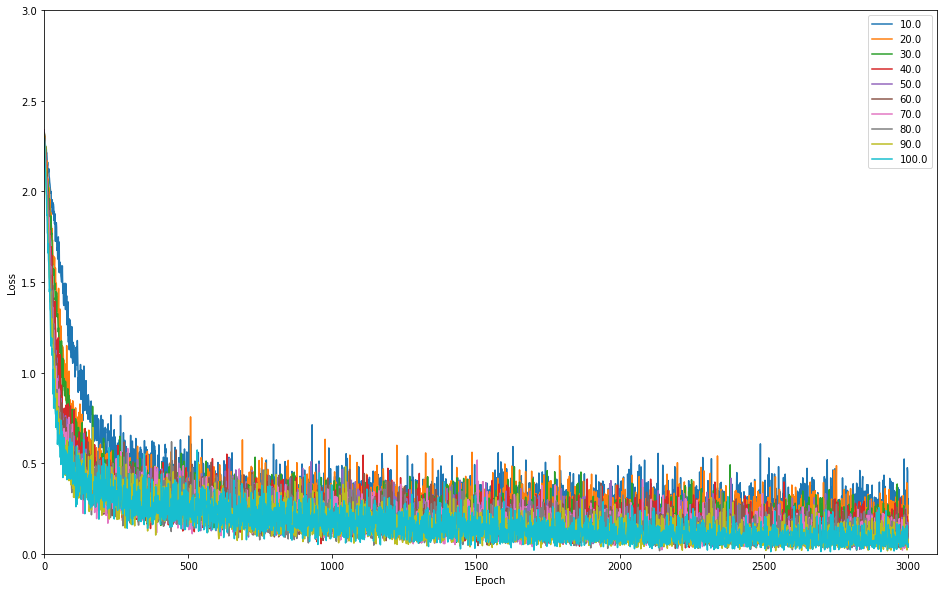

In [23]:
grid=np.linspace(0,3000,3000)
labels=np.linspace(10,110,11)
fig = plt.figure(figsize=(16,10))
for res in range(10):
    plt.plot(grid,historical[res],label=labels[res])
    plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim(0, 3)
plt.xlim(0, 3100)

plt.show()             

In [24]:
results

[tensor(92, device='cuda:0'),
 tensor(94, device='cuda:0'),
 tensor(95, device='cuda:0'),
 tensor(95, device='cuda:0'),
 tensor(96, device='cuda:0'),
 tensor(96, device='cuda:0'),
 tensor(96, device='cuda:0'),
 tensor(96, device='cuda:0'),
 tensor(97, device='cuda:0'),
 tensor(97, device='cuda:0')]

# Разные объемы выборок

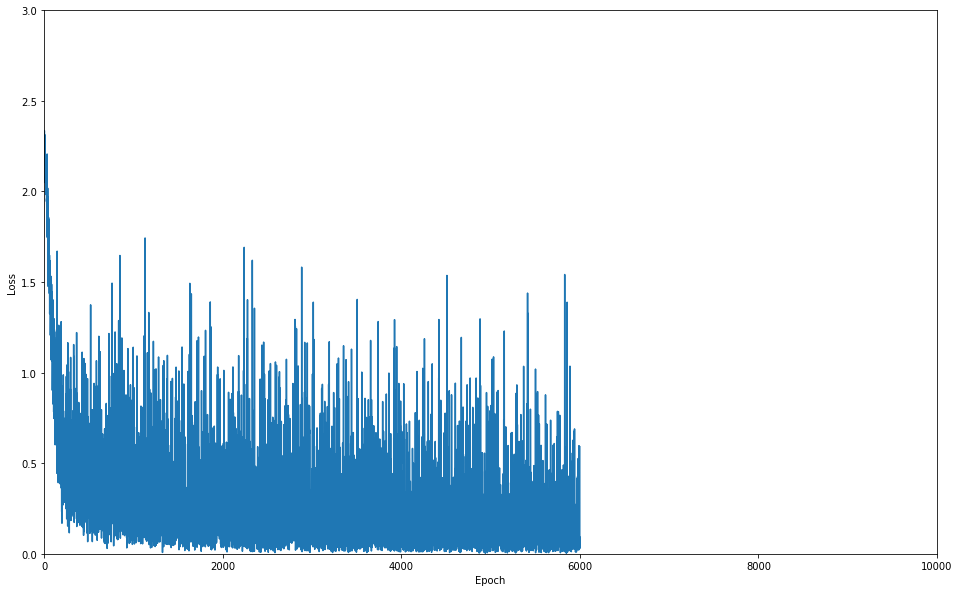

In [25]:
historical=[]
results=[]
#pfrh=загружаем тренировочные и тестовые данные
for ter in range(5):
    input_size = 784       # The image size = 28 x 28 = 784
    hidden_size_one = 40 # The number of nodes at the hidden layer
    hidden_size_two=20
    hidden_size_three=10 
    num_classes = 10       # The number of output classes. In this case, from 0 to 9
    num_epochs = 1        # The number of times entire dataset is trained
    batch_size = 10    # The size of input data took for one iteration
    learning_rate = 0.001  # The speed of convergence
    
    train_dataset = dsets.MNIST(root='./data',
                                train=True,
                                transform=transforms.ToTensor(),
                                download=True)

    test_dataset = dsets.MNIST(root='./data',
                               train=False,
                               transform=transforms.ToTensor())

    train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                              batch_size=batch_size,
                                              shuffle=True)

    test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                              batch_size=batch_size,
                                              shuffle=False)
    net = Net(input_size, hidden_size_one,hidden_size_two,hidden_size_three, num_classes)
    net.cuda()
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(net.parameters(), lr=learning_rate)
    history=[]
    for epoch in range(num_epochs):
        for i, (images, labels) in enumerate(train_loader): 
            if i>(10**ter+10):
                break                                          # Load a batch of images with its (index, data, class)
            images = Variable(images.view(-1, 28*28))       # Convert torch tensor to Variable: change image from a vector of size 784 to a matrix of 28 x 28
            labels = Variable(labels)
            labels=labels.type(torch.cuda.LongTensor)
            images = images.type(torch.cuda.FloatTensor)
            optimizer.zero_grad()                             # Intialize the hidden weight to all zeros
            outputs = net(images)                            # Forward pass: compute the output class given a image
            loss = criterion(outputs, labels)                 # Compute the loss: difference between the output class and the pre-given label
            loss.backward()                                   # Backward pass: compute the weight
            optimizer.step()  
            loss = loss.type(torch.FloatTensor)
            # Optimizer: update the weights of hidden nodes

            history.append(loss.data.numpy())
            if (i+1) % batch_size == 0:                              # Logging
                fig = plt.figure(figsize=(16,10))
                clear_output(True)
                plt.plot(history,label='loss')
                plt.xlabel('Epoch')
                plt.ylabel('Loss')
                plt.ylim(0, 3)
                plt.xlim(0, 10000)
                #plt.legend()
                plt.show()
                
    historical.append(history)
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = Variable(images.view(-1, 28*28))
        images=images.type(torch.cuda.FloatTensor)
        outputs = net(images)

        _, predicted = torch.max(outputs.data, 1)  # Choose the best class from the output: The class with the best score
        labels=labels.type(torch.cuda.LongTensor)
        total += labels.size(0)                    # Increment the total count
        correct += (predicted == labels).sum()     # Increment the correct count

    results.append(100 * correct / total)

(0, 3100)

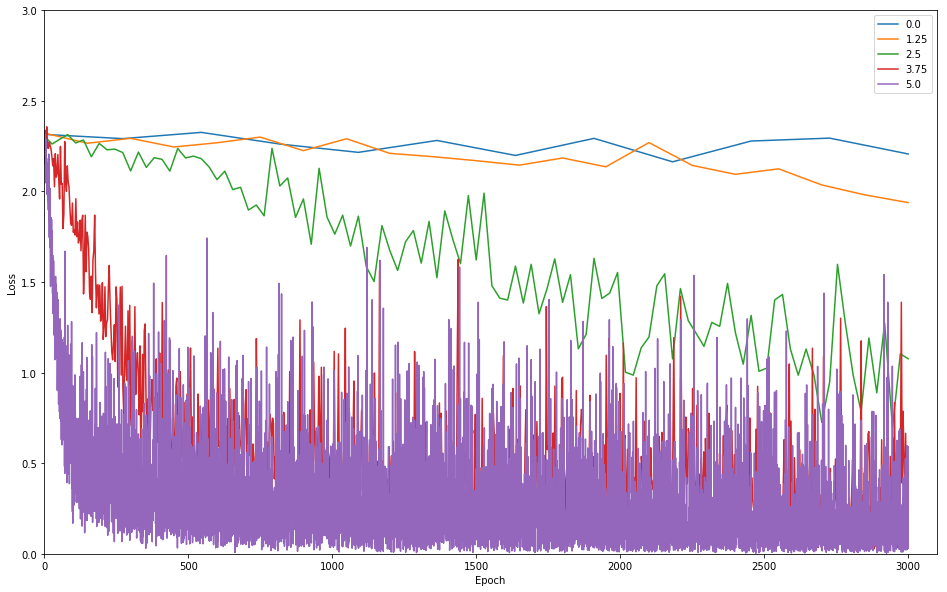

In [26]:

labels=np.linspace(0,5,5)
fig = plt.figure(figsize=(16,10))
for res in range(4):
    grid=np.linspace(0,3000,(10**res+11))
    plt.plot(grid,historical[res],label=labels[res])
    plt.legend()
grid=np.linspace(0,3000,6000)
plt.plot(grid,historical[4],label=labels[4])
plt.legend()
         

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim(0, 3)
plt.xlim(0, 3100)


In [31]:
results

[tensor(92, device='cuda:0'),
 tensor(90, device='cuda:0'),
 tensor(88, device='cuda:0'),
 tensor(75, device='cuda:0')]

# добавили шум

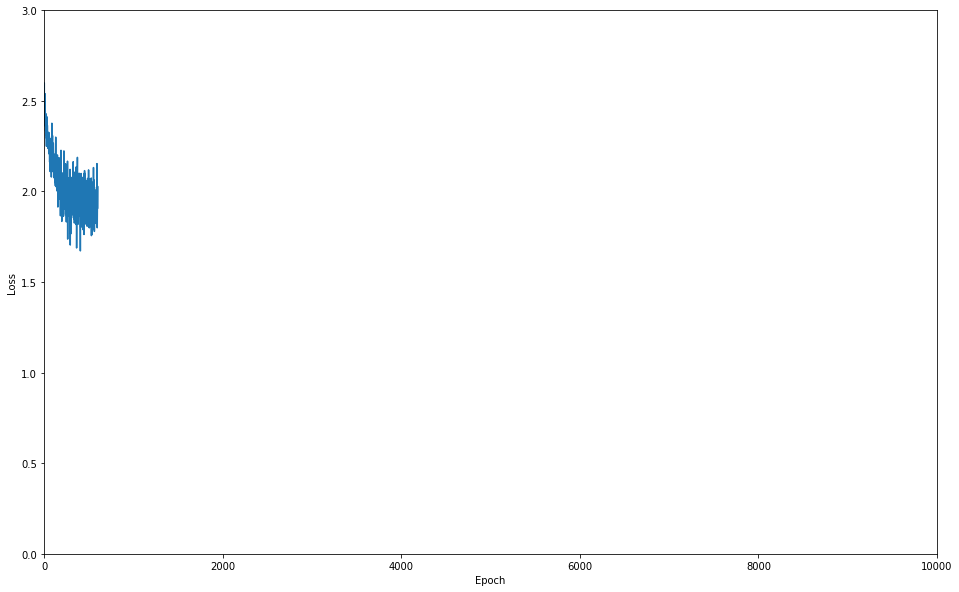

In [28]:
import numpy as np 
historical=[]
results=[]
for sigma in [0.1,0.5,1,3]:
    mu=0
    # creating a noise with the same dimension as the dataset (2,2) 
    
    
    
    #pfrh=загружаем тренировочные и тестовые данные

    input_size = 784       # The image size = 28 x 28 = 784
    hidden_size_one = 40 # The number of nodes at the hidden layer
    hidden_size_two=20
    hidden_size_three=10 
    num_classes = 10       # The number of output classes. In this case, from 0 to 9
    num_epochs = 1        # The number of times entire dataset is trained
    batch_size = 100    # The size of input data took for one iteration
    learning_rate = 0.001  # The speed of convergence
    
    train_dataset = dsets.MNIST(root='./data',
                                train=True,
                                transform=transforms.ToTensor(),
                                download=True)

    test_dataset = dsets.MNIST(root='./data',
                               train=False,
                               transform=transforms.ToTensor())

    train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                              batch_size=batch_size,
                                              shuffle=True)
    
    test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                              batch_size=batch_size,
                                              shuffle=False)
    net = Net(input_size, hidden_size_one,hidden_size_two,hidden_size_three, num_classes)
    net.cuda()
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(net.parameters(), lr=learning_rate)
    history=[]
    for epoch in range(num_epochs):
        for i, (images, labels) in enumerate(train_loader): 
                                                     # Load a batch of images with its (index, data, class)
            images = Variable(images.view(-1, 28*28))       # Convert torch tensor to Variable: change image from a vector of size 784 to a matrix of 28 x 28
            noise = torch.from_numpy(np.random.normal(mu, sigma, [batch_size,784])) 
            noise=noise.type(torch.FloatTensor)
            images=torch.add(images, noise)
            labels = Variable(labels)
            labels=labels.type(torch.cuda.LongTensor)
            
            images = images.type(torch.cuda.FloatTensor)
            optimizer.zero_grad()                             # Intialize the hidden weight to all zeros
            outputs = net(images)                            # Forward pass: compute the output class given a image
            loss = criterion(outputs, labels)                 # Compute the loss: difference between the output class and the pre-given label
            loss.backward()                                   # Backward pass: compute the weight
            optimizer.step()  
            loss = loss.type(torch.FloatTensor)
            # Optimizer: update the weights of hidden nodes

            history.append(loss.data.numpy())
            if (i+1) % batch_size == 0:                              # Logging
                fig = plt.figure(figsize=(16,10))
                clear_output(True)
                plt.plot(history,label='loss')
                plt.xlabel('Epoch')
                plt.ylabel('Loss')
                plt.ylim(0, 3)
                plt.xlim(0, 10000)
                #plt.legend()
                plt.show()
                
    historical.append(history)
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = Variable(images.view(-1, 28*28))
        images=images.type(torch.cuda.FloatTensor)
        outputs = net(images)

        _, predicted = torch.max(outputs.data, 1)  # Choose the best class from the output: The class with the best score
        labels=labels.type(torch.cuda.LongTensor)
        total += labels.size(0)                    # Increment the total count
        correct += (predicted == labels).sum()     # Increment the correct count

    results.append(100 * correct / total)

(0, 700)

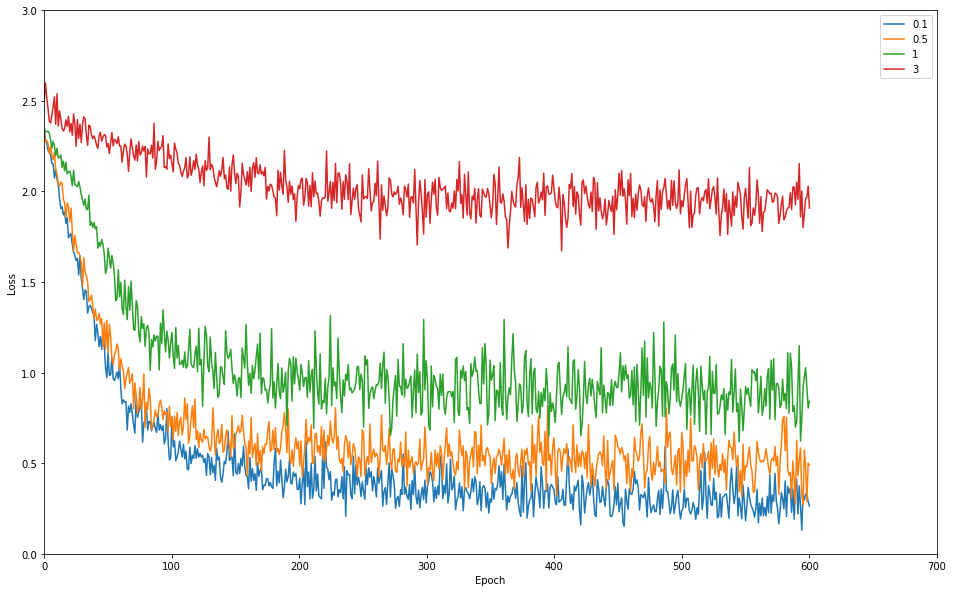

In [29]:
labels= [0.1,0.5,1,3]
fig = plt.figure(figsize=(16,10))
for res in range(4):
    grid=np.linspace(0,600,600)
    plt.plot(grid,historical[res],label=labels[res])
    plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim(0, 3)
plt.xlim(0, 700)

In [30]:
results

[tensor(92, device='cuda:0'),
 tensor(90, device='cuda:0'),
 tensor(88, device='cuda:0'),
 tensor(75, device='cuda:0')]